# Stacking base models to create one combined model


Now import all the `sklearn` packages that will be needed and our data sets.:

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_curve
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import StratifiedKFold

In [2]:
df = pd.read_csv("my_full_data.csv")

X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Take final models from everyone's individual exploration, and train them on the training data.

In [3]:
SVM = SVC(kernel='rbf' , C = 5, gamma = 0.01, probability = True)
DecisionTree = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, splitter = 'best', min_samples_split = 4, min_samples_leaf = 1, max_features = 20)
LogisticRegression = LogisticRegression(C=100, penalty='l1',max_iter=500,solver= 'liblinear', tol=0.0001)
KNN = KNeighborsClassifier(leaf_size=20, n_neighbors=10, p=1)

In [4]:
DecisionTree = DecisionTree.fit(X_train,y_train)


In [5]:
LogisticRegression = LogisticRegression.fit(X_train,y_train)


In [6]:
KNN = KNN.fit(X_train,y_train)


In [7]:
#SVM = SVM.fit(X_train,y_train) #Takes a long time to fit.

## Creating the stacked model

First, we will make a list of all the base models that we are going to use.

In [8]:
base_classifiers = [
    ('DecisionTree', DecisionTree),
    ('LogisticRegression', LogisticRegression),
    ('KNN', KNN)#,
   # ('SVM', SVM)
]

Now create the stacked model and fit to the training data. We can then measure its performance against the test data.

In [9]:
StackedModel = StackingClassifier(estimators = base_classifiers)

In [10]:
StackedModel = StackedModel.fit(X_train,y_train)

In [11]:
ypred = StackedModel.predict(X_test)

In [12]:
print('The accuracy of the stacked model is:',accuracy_score(y_test, ypred)*100)

The accuracy of the stacked model is: 90.09188361408881


## Plotting ROC curve vor stacked and base models
We now plot an ROC curve so that we can compare how the stacked model has (or has not) made improvements from our base models.

In [13]:
yProbPred = StackedModel.predict_proba(X_test)

# printing an ROC curve

y_Pred_DecisionTree = DecisionTree.predict_proba(X_test)
y_Pred_LogisticRegression = LogisticRegression.predict_proba(X_test)
y_Pred_KNN = KNN.predict_proba(X_test)
#y_Pred_SVM = SVM.predict_proba(X_test)



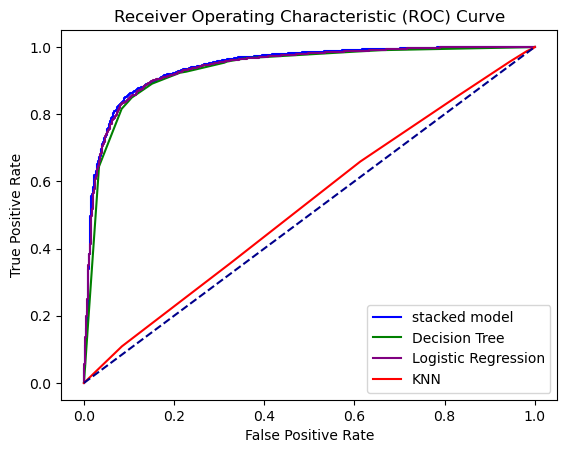

In [14]:

fprStacked, tprStacked, _ = metrics.roc_curve(y_test, yProbPred[:,1])
fprDecisionTree, tprDecisionTree, _ = metrics.roc_curve(y_test, y_Pred_DecisionTree[:,1])
fprLogisticRegression, tprLogisticRegression, _ = metrics.roc_curve(y_test, y_Pred_LogisticRegression[:,1])
fprKNN, tprKNN, _ = metrics.roc_curve(y_test, y_Pred_KNN[:,1])
#fprSVM, tprSVM, _ = metrics.roc_curve(y_test, y_Pred_SVM[:,1])


plt.plot(fprStacked, tprStacked, color='blue', label = 'stacked model')
plt.plot(fprDecisionTree, tprDecisionTree, color='green', label = 'Decision Tree')
plt.plot(fprLogisticRegression, tprLogisticRegression, color='purple', label = 'Logistic Regression')
plt.plot(fprKNN, tprKNN, color='red', label = 'KNN')
#plt.plot(fprSVM, tprSVM, color='orange', label = 'SVM')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

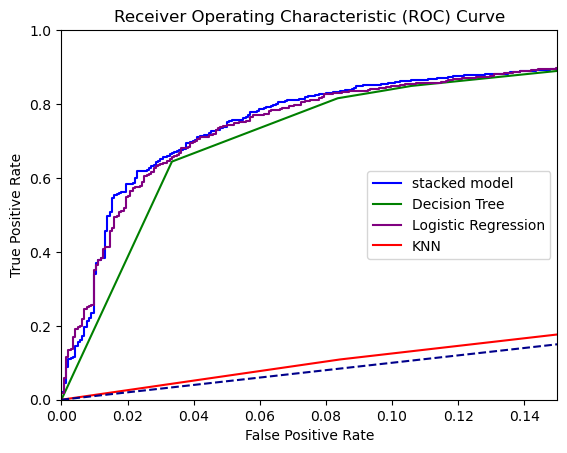

In [15]:
fprStacked, tprStacked, _ = metrics.roc_curve(y_test, yProbPred[:,1])
fprDecisionTree, tprDecisionTree, _ = metrics.roc_curve(y_test, y_Pred_DecisionTree[:,1])
fprLogisticRegression, tprLogisticRegression, _ = metrics.roc_curve(y_test, y_Pred_LogisticRegression[:,1])
fprKNN, tprKNN, _ = metrics.roc_curve(y_test, y_Pred_KNN[:,1])
#fprSVM, tprSVM, _ = metrics.roc_curve(y_test, y_Pred_SVM[:,1])


plt.plot(fprStacked, tprStacked, color='blue', label = 'stacked model')
plt.plot(fprDecisionTree, tprDecisionTree, color='green', label = 'Decision Tree')
plt.plot(fprLogisticRegression, tprLogisticRegression, color='purple', label = 'Logistic Regression')
plt.plot(fprKNN, tprKNN, color='red', label = 'KNN')
#plt.plot(fprSVM, tprSVM, color='orange', label = 'SVM')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

plt.ylim(0, 1)
plt.xlim(0,0.15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

We can see that the stacked models is an improvement from all the base models, although it performs very closely to the level of the logistic regression mmodel.